# Corsework part one

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [4]:
initial_data = yf.download("TWTR", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  1 of 1 completed


In [5]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,36.000000,36.860001,35.139999,35.820000,35.820000,39914700
2020-03-03,36.020000,36.480000,34.410000,34.930000,34.930000,22973100
2020-03-04,35.759998,36.000000,34.770000,36.000000,36.000000,14980300
2020-03-05,35.029999,35.730000,34.520000,34.970001,34.970001,14132200
2020-03-06,33.810001,33.990002,32.509998,33.459999,33.459999,20361100


In [6]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-23,68.449997,74.330002,66.190002,73.169998,73.169998,32669500
2021-02-24,73.099998,73.949997,71.709999,71.919998,71.919998,18309900
2021-02-25,78.150002,80.750000,73.889999,74.589996,74.589996,63625700
2021-02-26,76.870003,79.080002,75.000000,77.059998,77.059998,35307600
2021-03-01,78.360001,78.730003,76.050003,77.629997,77.629997,24277600


In [7]:
initial_data['Adj Close'].head()

Date
2020-03-02    35.820000
2020-03-03    34.930000
2020-03-04    36.000000
2020-03-05    34.970001
2020-03-06    33.459999
Name: Adj Close, dtype: float64

Set the Adj Closed data as a new DataFrame we will use.

In [8]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [9]:
data.tail()

,Adj Close
Date,
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996
2021-02-26,77.059998
2021-03-01,77.629997


array([<AxesSubplot:xlabel='Date'>], dtype=object)

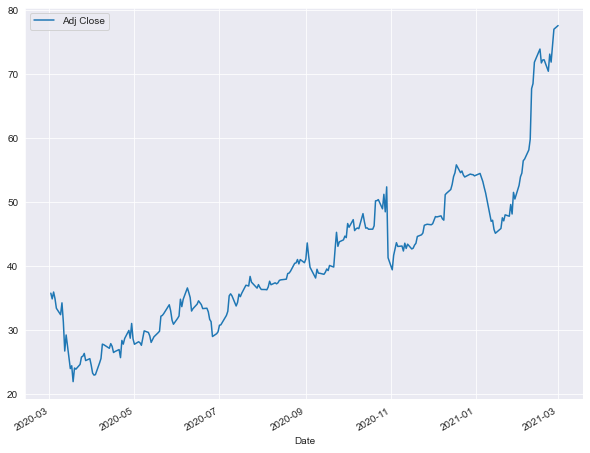

In [10]:
data.plot(figsize=(10, 8), subplots=True)

### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.diff().head().round(2)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.89
2020-03-04,1.07
2020-03-05,-1.03
2020-03-06,-1.51


In [12]:
data.diff().tail().round(2)

,Adj Close
Date,
2021-02-23,2.68
2021-02-24,-1.25
2021-02-25,2.67
2021-02-26,2.47
2021-03-01,0.57


In [13]:
data.diff().describe().round(2)

,Adj Close
count,251.00
mean,0.17
std,1.58
min,-11.07
25%,-0.58
50%,0.16
75%,0.80
max,7.90


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [14]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0248
2020-03-04,0.0306
2020-03-05,-0.0286
2020-03-06,-0.0432


As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0252
2020-03-04,0.0302
2020-03-05,-0.0290
2020-03-06,-0.0441


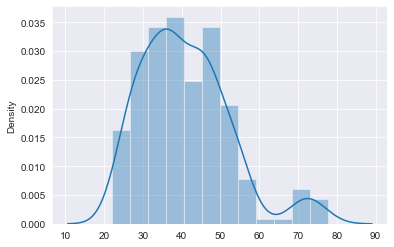

In [39]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data)
import warnings
warnings.filterwarnings('ignore')

(0.0, 50.0)

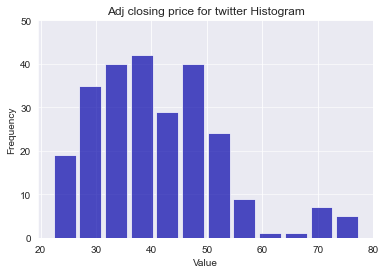

In [17]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85,)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Adj closing price for twitter Histogram')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [18]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,33.459999
2020-03-15,29.290001
2020-03-22,23.950001
2020-03-29,25.290001
2020-04-05,23.090000


In [19]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,24.559999
2020-04-30,28.680000
2020-05-31,30.969999
2020-06-30,29.790001
2020-07-31,36.400002


<AxesSubplot:xlabel='Date'>

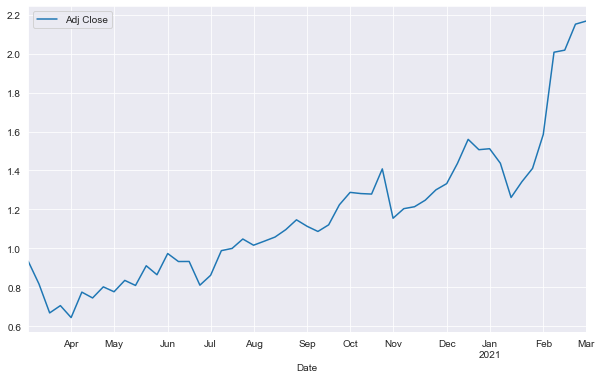

In [20]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

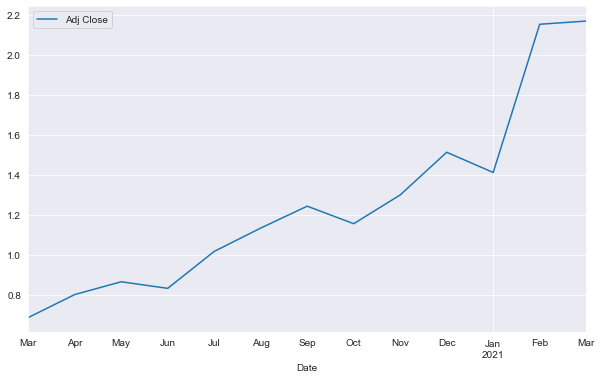

In [21]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### The normal daily returns and log-returns. Then the annualized return and volatility of Twitter (TWYR)

In [22]:
data.describe().round(2)

,Adj Close
count,252.00
mean,40.90
std,11.50
min,22.00
25%,32.43
50%,39.17
75%,47.22
max,77.63


In [23]:
data.head()

,Adj Close
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999


In [24]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.02484643766697288,
 0.03063268495493459,
 -0.028611077202690974,
 -0.04317992803890751,
 -0.029886432377819665]

In [25]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.02516032055734001,
 0.030172870900587793,
 -0.029028352473673566,
 -0.04413991778560414,
 -0.03034213431517314]

In [26]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.97061639 and its annulized volatility is 0.61893803


In [27]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.77344753 and its annulized volatility is 0.63171734


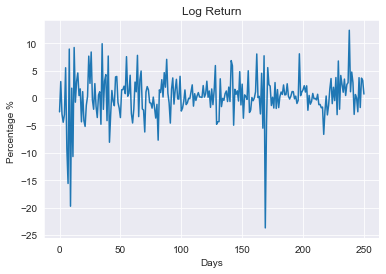

In [28]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

### The semi annually (last 6 months) return and volatility of Twitter

In [29]:
normal_return_last_6months=normal_return [125:]

In [30]:
len(dfnr)

251

In [31]:
normal_return_last_6months[:5]

[0.016835858268174637,
 -0.011930797842963765,
 0.01404632008636369,
 0.061239284316468384,
 -0.04671392686892221]

In [32]:
log_return_last_6months=log_return [125:]

In [33]:
log_return_last_6months [:5]

[0.016695706073972943,
 -0.012002541018077469,
 0.013948584684210502,
 0.05943736136414435,
 -0.04784023870389146]

In [34]:
dfnr1 = pd.DataFrame(normal_return_last_6months, columns = ['normal']) 
nr1 = dfnr1.mean() * len(dfnr)
nv1 = dfnr1.std() * (len(dfnr) ** 0.5)
print('The annulized normal return (for the last 6 months) is %.8f and its annulized volatility (for the last 6 months)is %.8f' % (nr1,nv1))

The annulized normal return (for the last 6 months) is 1.46987082 and its annulized volatility (for the last 6 months)is 0.56762430


In [35]:
dflr1 = pd.DataFrame(log_return_last_6months, columns = ['log']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The semi annulized log return (for the last 6 months) is %.8f and its annulized volatility (for the last 6 months) is %.8f' % (lr1,lv1))

The semi annulized log return (for the last 6 months) is 1.30155791 and its annulized volatility (for the last 6 months) is 0.58124604


### The average for the log volatility (for the last one year and 6 months )

In [36]:
all_lv=lv,lv1
all_lv1 = pd.DataFrame (all_lv)

In [37]:
all_lv1['Time'] = ('last year', 'last 6 months')
all_lv1

,log,Time
0,0.631717,last year
1,0.581246,last 6 months


In [38]:
lvv=all_lv1 ['log'].mean()
print ('The combine Log volatility =', lvv)

The combine Log volatility = 0.6064816874048876
